<a href="https://colab.research.google.com/github/robd123/AML/blob/main/Project7/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD, Adam
from matplotlib import figure, pyplot
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
datapath = os.path.join("datasets", "zipped", "")
os.makedirs(datapath, exist_ok=True)

# Dataset is already split into test and train data
file_path = "https://raw.githubusercontent.com/robd123/AML/master/Project7/facesDB.zip"

urllib.request.urlretrieve(file_path, datapath + "facesDB.zip")

('datasets/zipped/facesDB.zip', <http.client.HTTPMessage at 0x7f9f366c56d0>)

In [3]:
!unzip datasets/zipped/facesDB.zip

Archive:  datasets/zipped/facesDB.zip
replace facesDB/S1/1.BMP? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Import Images and Split Train and Test Data**

---
Because of the relatively high number of target classes compared to images, 40 classes and 400 images, a direct train/test split is not feasible as it may leave certain target classes out of the test set entirely.  For this dataset, 2 images will be selected randomly from each target class and added to the test set with the rest added to the training set.


In [4]:
train_images = list()
train_labels = list()
test_images = list()
test_labels = list()
for i in range(1, 41):
  rands = random.sample(range(1, 11), 2) # Get 2 random numbers, these will be the indices of the images to be used in the test set
  for j in range(1, 11):
    img = cv2.imread("facesDB/S{0}/{1}.BMP".format(str(i), str(j)))
    if j in rands:
      test_images.append(img)
      test_labels.append(i - 1)
    else:
      train_images.append(img)
      train_labels.append(i - 1)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(320, 48, 48, 3)
(320,)
(80, 48, 48, 3)
(80,)


**Display Some of the Training Images**

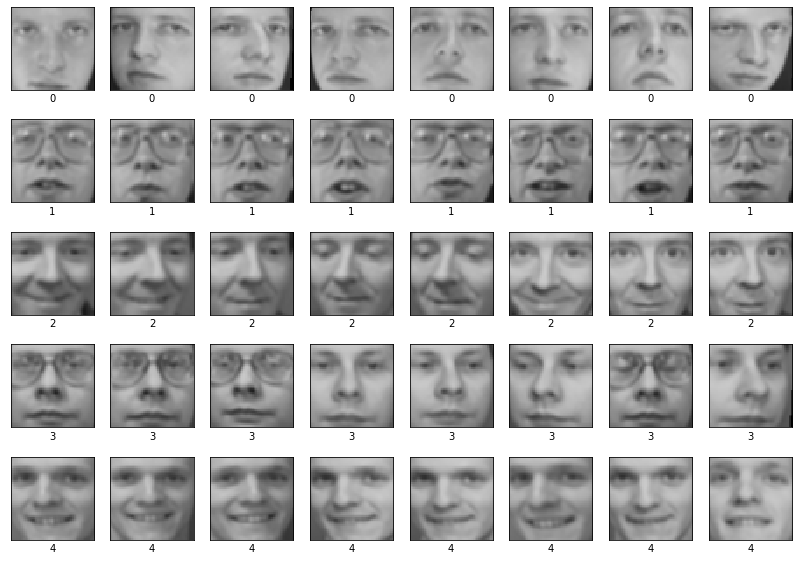

In [6]:
plt.figure( figsize=(14, 10), num='Some Images' )
plt.title( 'First 5 Targets' )
for i in range( 40 ):
    plt.subplot( 5, 8, i+1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(train_labels[i])
plt.show()

**Normalize Data**

In [15]:
x_train = train_images.astype( 'float32' )/255
x_test = test_images.astype( 'float32' )/255
print(x_train[0].shape)

(48, 48, 3)


In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train.shape)
print(y_test.shape)

(320, 40)
(80, 40)


In [77]:
 def create_model_1():
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(40, activation="softmax")
    ])
  opt = SGD(momentum=0.5)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )

In [61]:
history = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/100
40/40 [==============================] - 1s 13ms/step - loss: 3.6934 - accuracy: 0.0137 - val_loss: 3.6878 - val_accuracy: 0.0250
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 3.6903 - accuracy: 0.0280 - val_loss: 3.6875 - val_accuracy: 0.0250
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 3.6889 - accuracy: 0.0264 - val_loss: 3.6866 - val_accuracy: 0.0250
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 3.6901 - accuracy: 0.0129 - val_loss: 3.6856 - val_accuracy: 0.0250
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 3.6874 - accuracy: 0.0317 - val_loss: 3.6846 - val_accuracy: 0.0250
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 3.6835 - accuracy: 0.0331 - val_loss: 3.6835 - val_accuracy: 0.0250
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 3.6841 - accuracy: 0.0243 - val_loss: 3.6828 - val_accuracy: 0.0250
Epoch 8/100


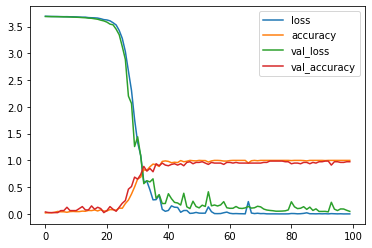

In [54]:
pd.DataFrame(model.history.history).plot()

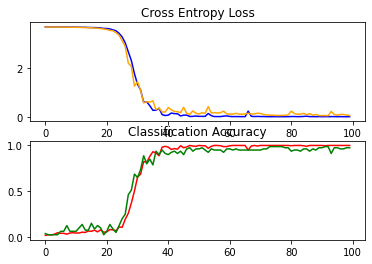

In [55]:
pyplot.subplot(2, 1, 1)
pyplot.title('Cross Entropy Loss')
pyplot.plot(model.history.history['loss'], color='blue', label='train')
pyplot.plot(model.history.history['val_loss'], color='orange', label='test')	

pyplot.subplot(2, 1, 2)
pyplot.title('Classification Accuracy')
pyplot.plot(model.history.history['accuracy'], color='red', label='train')
pyplot.plot(model.history.history['val_accuracy'], color='green', label='test')
pyplot.show()

In [84]:
def evaluate_model(model, dataX, dataY, n_folds, batch_size, epochs):

  scores, histories = list(), list()
 
	# prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
 
	# enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
  
		# select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

		# fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(testX, testY))
  
		# evaluate model
    _, acc = model.evaluate(testX, testY)
    print('CV Fold accuracy:  %.3f' % (acc * 100.0))
  
		# stores scores
    scores.append(acc)
    histories.append(history)
  
  return scores, histories

In [85]:
def summarize_learning(histories):

  for i in range(len(histories)):
		
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    pyplot.show()

In [86]:
def summarize_performance(scores):

	# print summary
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

In [100]:
def predict_and_map(model, x_test, test_labels):
  y_pred = model.predict(x_test)
  pred_labels = np.argmax(y_pred, axis = 1)
  cm = confusion_matrix(test_labels, pred_labels)
  plt.figure(figsize=(20,10))
  heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=np.arange(0,40), vmax=2, vmin=0, linewidths=.3, linecolor='black')
  heatmap.set(xlabel="Predicted", ylabel = "Actual")
  print("Accuracy on Test Data: " + str(accuracy_score(test_labels, pred_labels)))

In [94]:
# The main driver for evaluating the model

def process(model, num_folds, batch_size, epochs):
	# evaluate the model using CV
  scores, histories = evaluate_model(model, x_train, y_train, num_folds, batch_size, epochs)
 
	# learning curves
  summarize_learning(histories)
 
	# summarize estimated performance
  summarize_performance(scores)
  predict_and_map(model, x_test, test_labels)


Epoch 1/50
15/15 [==============================] - 1s 28ms/step - loss: 3.6931 - accuracy: 5.2083e-04 - val_loss: 3.6929 - val_accuracy: 0.0250
Epoch 2/50
15/15 [==============================] - 0s 15ms/step - loss: 3.6863 - accuracy: 0.0242 - val_loss: 3.6994 - val_accuracy: 0.0250
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 3.6862 - accuracy: 0.0293 - val_loss: 3.7057 - val_accuracy: 0.0125
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 3.6760 - accuracy: 0.0282 - val_loss: 3.7113 - val_accuracy: 0.0125
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 3.6743 - accuracy: 0.0449 - val_loss: 3.7209 - val_accuracy: 0.0250
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 3.6702 - accuracy: 0.0391 - val_loss: 3.7304 - val_accuracy: 0.0250
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 3.6662 - accuracy: 0.0408 - val_loss: 3.7383 - val_accuracy: 0.0125
Epoch 8/5

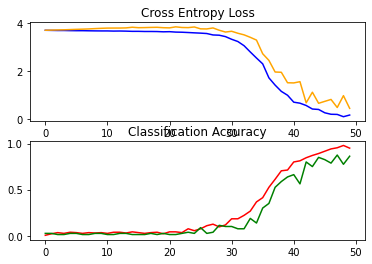

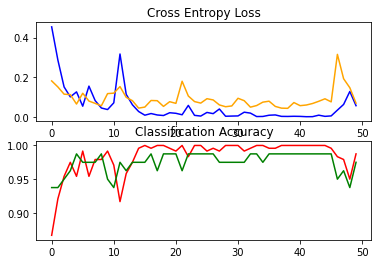

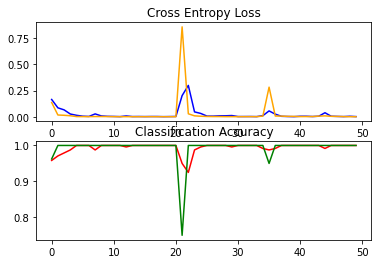

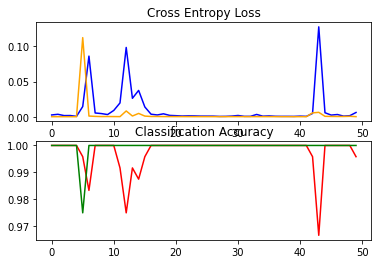

Model Accuracy: mean=95.938 std=5.685, folds=4
Accuracy on Test Data: 0.9375


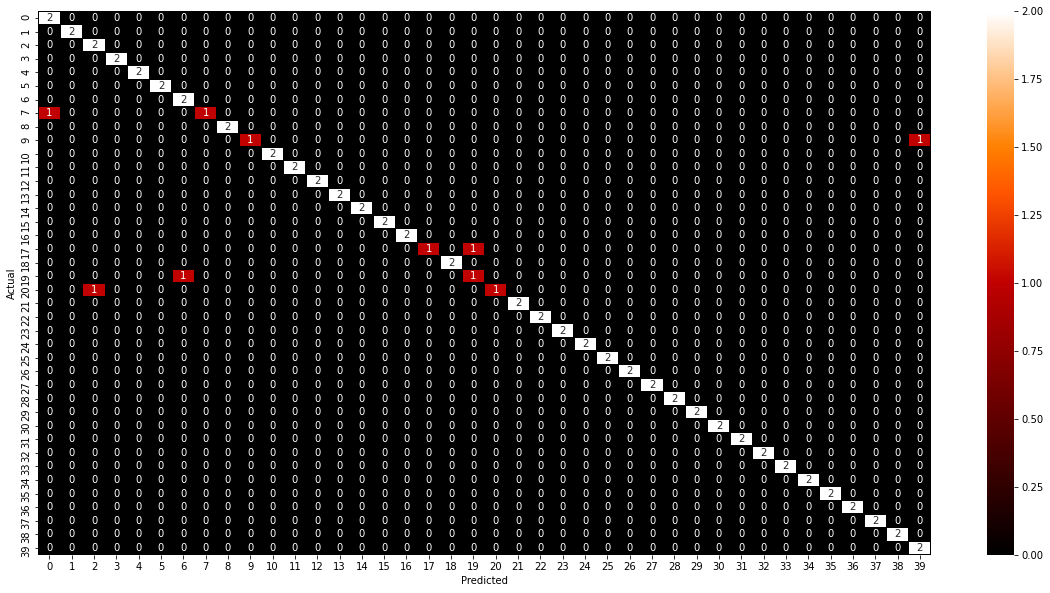

In [101]:
model = create_model_1()
process(model, 4, 16, 50)

In [102]:
 def create_model_2(optimizer):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Epoch 1/100
30/30 [==============================] - 1s 18ms/step - loss: 3.6892 - accuracy: 0.0150 - val_loss: 3.7026 - val_accuracy: 0.0125
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 3.6963 - accuracy: 0.0155 - val_loss: 3.7004 - val_accuracy: 0.0125
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 3.6951 - accuracy: 0.0234 - val_loss: 3.7008 - val_accuracy: 0.0125
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 3.6851 - accuracy: 0.0459 - val_loss: 3.7081 - val_accuracy: 0.0125
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 3.6880 - accuracy: 0.0409 - val_loss: 3.7159 - val_accuracy: 0.0125
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 3.6940 - accuracy: 0.0071 - val_loss: 3.7166 - val_accuracy: 0.0125
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 3.6867 - accuracy: 0.0219 - val_loss: 3.7213 - val_accuracy: 0.0125
Epoch 8/100


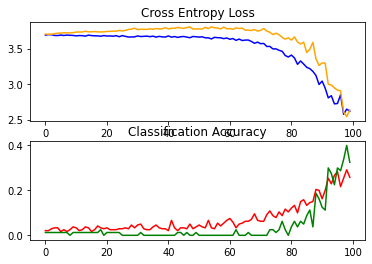

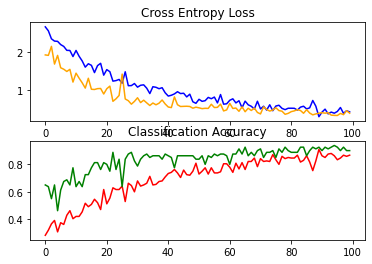

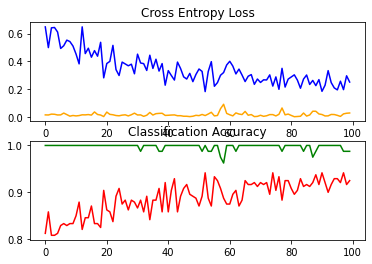

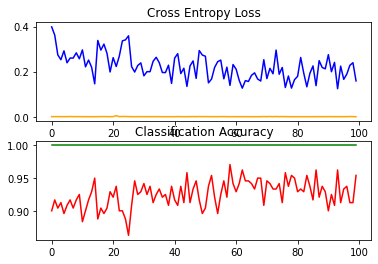

Model Accuracy: mean=80.312 std=27.872, folds=4
Accuracy on Test Data: 0.9625


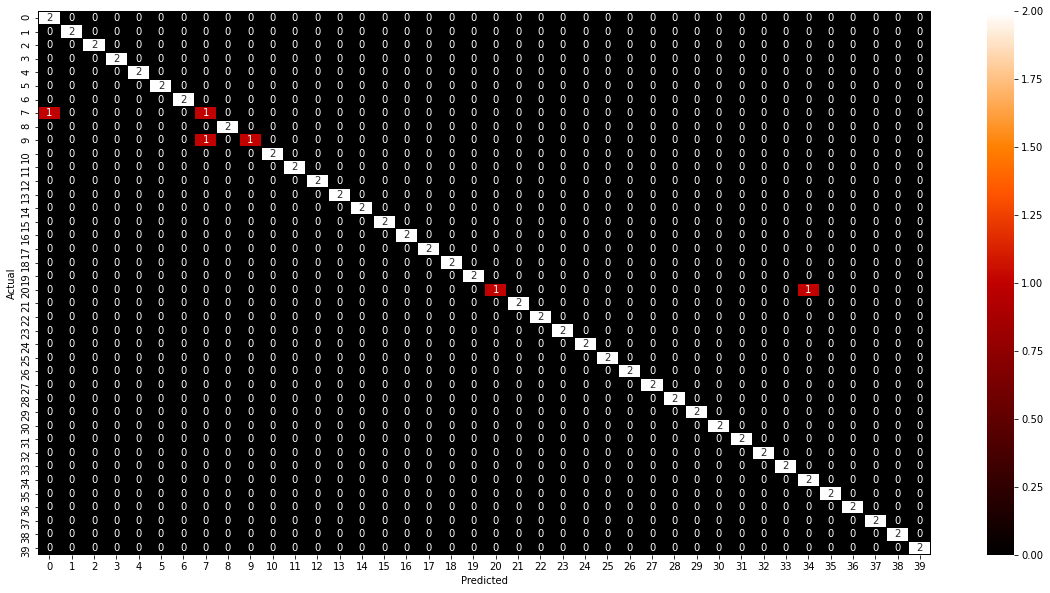

In [106]:
model = create_model_2(SGD(momentum=0.3))
process(model, 4, 8, 100)

Epoch 1/50
15/15 [==============================] - 1s 27ms/step - loss: 3.7435 - accuracy: 0.0416 - val_loss: 3.6916 - val_accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 0s 15ms/step - loss: 3.6887 - accuracy: 0.0429 - val_loss: 3.6951 - val_accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 3.6878 - accuracy: 0.0153 - val_loss: 3.6976 - val_accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 3.6827 - accuracy: 0.0397 - val_loss: 3.7119 - val_accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 3.6913 - accuracy: 0.0295 - val_loss: 3.7060 - val_accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 3.6883 - accuracy: 0.0302 - val_loss: 3.7100 - val_accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 3.6862 - accuracy: 0.0144 - val_loss: 3.7156 - val_accura

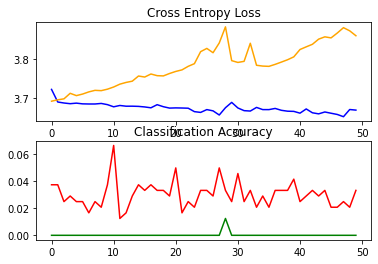

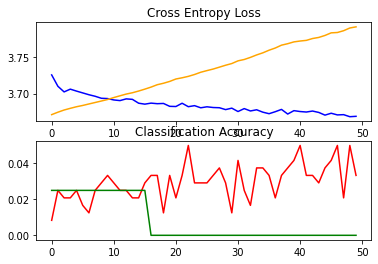

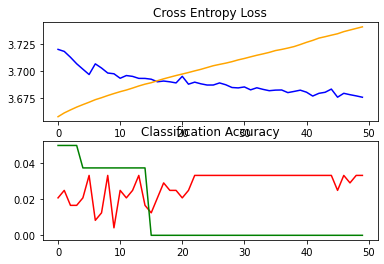

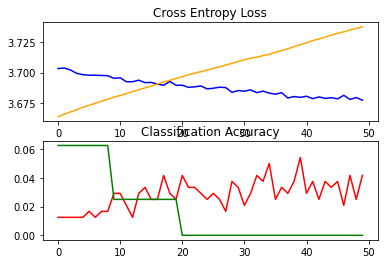

Model Accuracy: mean=0.000 std=0.000, folds=4
Accuracy on Test Data: 0.025


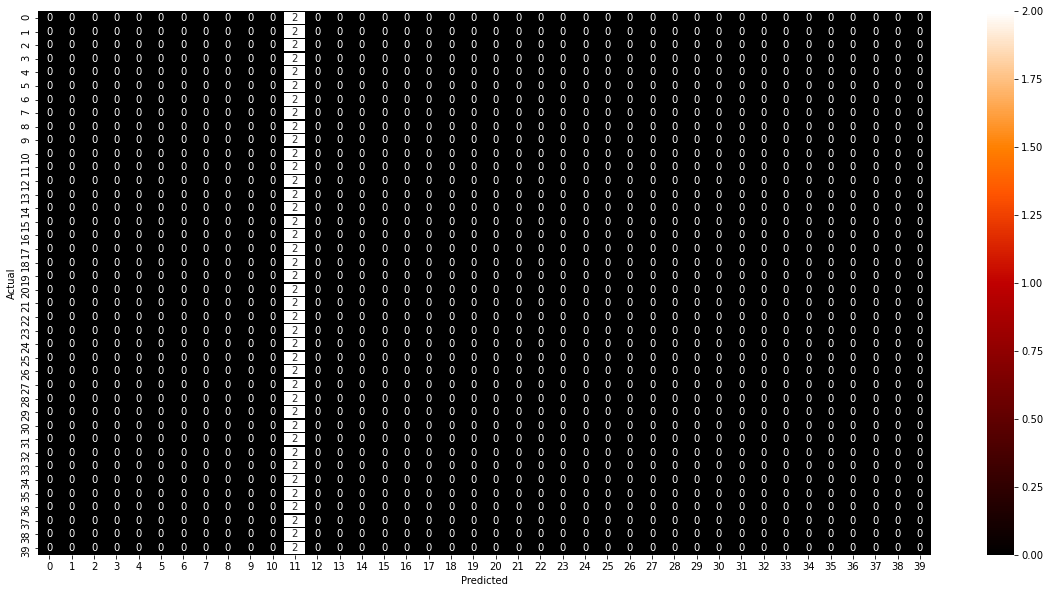

In [104]:
model = create_model_2('adam')
process(model, 4, 16, 50)